

--------------------------------------------------
# 1. Architectures
    1.1 Arch 1 "the simple one"

        1.1.1 Task Arch1
        1.1.2 Agent Arch1
        1.1.3 Crew Arch1
        1.1.4 Executing Arch1

    1.2 Arch 2 "Agent Mania"
        1.2.1 Agent Arch2
        1.2.2 Task Arch2
        1.2.3 Crew Arch2
        1.2.4 Executing Arch2

    1.3 Arch 3 "Task Mania"
        1.3.1 Agent Arch3
        1.3.2 Task Arch3
        1.3.3 Crew Arch3
        1.3.4 Executing Arch3

# 2. Bleurt evaluation
    2.1 Arch1
    2.2 Arch2
    2.3 Arch3
# 3. MANUAL Evaluation
-------------------------------------------------

## 1.1 ARCH1 "The simple one"

### Crew Arch1

In [ ]:
import os
from crewai import Crew, Process
from langchain_openai import ChatOpenAI
from textwrap import dedent
#from agents import AgentArchitecture1
#from tasks import TaskArchitecture1

chatgpt4= ChatOpenAI(
    model="gpt-4",
    api_key=os.getenv("OPENAI_API_KEY")
)


class CrewArchitecture1:
    def __init__(self,cv,linkedin):
        self.cv= cv
        self.linkedin= linkedin
  

    def run(self):

        #agents= AgentArchitecture1()
        #tasks= TaskArchitecture1()

     

        cv_analyser_agent= agents.cv_analyser_agent(self.cv)
        linkedin_analyser_agent= agents.linkedin_analyser_agent(self.linkedin)
        summarizer_agent= agents.summarizer_agent()

        cv_analysis_task= tasks.cv_analysis_task(self.cv, cv_analyser_agent)
        linkedin_analysis_task= tasks.linkedin_analysis_task(self.linkedin, linkedin_analyser_agent)
        summary_analysis_task= tasks.summarizer_task(summarizer_agent)

        



        crew_architecture1= Crew(
            agents=[
                cv_analyser_agent,
                linkedin_analyser_agent,
                summarizer_agent
            ],
            tasks=[
                cv_analysis_task,
                linkedin_analysis_task,
                summary_analysis_task
            ],
            verbose=True,
            process=Process.sequential,
            manager_llm=chatgpt4
        )

        result= crew_architecture1.kickoff()
        return result

### 1.1.1 Task Arch1

In [31]:
from crewai import Task
from textwrap import dedent




class TaskArchitecture1:


    def __tip_section(self):
        return "if you do your BEST WORK, I'll give you a 10 000$ commission"
    
    def cv_analysis_task(self, cv, agent):
        return Task(
            description=dedent(
                f"""
                **Task**: Analyse information of a {cv}.

                **Description**:  analyse the section of the {cv} including experience, education, skills and languages.

                **Parameters**:
                - CV: {cv}
                
                **Note**: {self.__tip_section()}


                """
            ),
            expected_output=dedent(
                f"""
                return a summary of the profile of the {cv} in a cv_summary_arch1.txt

                """
            ),
           
    
            agent=agent,
            async_execution=False,

        )
    


    def linkedin_analysis_task(self, linkedin, agent):
        return Task(
            description=dedent(
                f"""
                **Task**: Analyse information from a LinkedIn profile.

                **Description**:  analyse the section of the LinkedIn profile including experience, education, skills and languages.

                **Parameters**:
                - LinkedIn: {linkedin}
                
                **Note**: {self.__tip_section()}


                """
            ),
            expected_output=dedent(
                f"""
                return a summary of the profile of the {linkedin} in a linkedin_summary_arch1.txt

                """
            ),
           
    
            agent=agent,
            async_execution=False,

        )  
    

    def summarizer_task(self, agent):
        return Task(
            description=dedent(
                f"""
                **Task**: Summarize information.

                **Description**:  analyse the differences between summaries of Cvs and LinkedIn profiles.
                highlight the extra info found in linkedIn profile that can enriched the cv.

                
                **Note**: {self.__tip_section()}


                """
            ),
            expected_output=dedent(
                f"""
                return a summary of the profiles, create a new file summary_arch1.txt each time don't overwrite the previous one

                """
            ),
            output_file="summary_arch1.txt",
            agent=agent,
            async_execution=False,

        )

### 1.1.2 Agents Arch1

In [32]:
import os
from textwrap import dedent
from crewai import Agent

from langchain_openai import ChatOpenAI







chatgpt4= ChatOpenAI(
    model_name="gpt-4",
    api_key=os.getenv("OPENAI_API_KEY"),
)



class AgentArchitecture1: 

    def cv_analyser_agent(self,cv):
        return Agent(
            name="cv_analyser_agent",
            role=f"Analyse information of a {cv}",
            goal="return a summary of the information in the CV",
            backstory="""You're a seasoned HR, who is used to analyse CVs to identify key qualifications and skills""",
            verbose=False,
            memory=True,
            allow_delegation=False,
            llm=chatgpt4
        )



    def linkedin_analyser_agent(self,linkedin):
        return Agent(
            name="linkedin_analyser_agent",
            role="Analyse information from a LinkedIn profile",
            goal="return a summary of the information in the LinkedIn profile",
            backstory="""You're a seasoned HR, who is used to analyse LinkedIn profiles to identify key qualifications and skills""",
            verbose=False,
            memory=True,
            allow_delegation=False,
            llm=chatgpt4
        )
    



    def summarizer_agent(self):
        return Agent(
            name="summarizer_agent",
            role="Summarize information",
            goal="return a summary of the information",
            backstory="""You're a seasoned HR, who is use to analyse the differences between summaries of Cvs and LinkedIn profiles""",
            verbose=False,
            memory=True,
            allow_delegation=False,
            llm=chatgpt4
        )
    


## 1.1.3 Crew Arch1

In [33]:
import os
from crewai import Crew, Process
from langchain_openai import ChatOpenAI
from textwrap import dedent
#from agents import AgentArchitecture1
#from tasks import TaskArchitecture1

chatgpt4= ChatOpenAI(
    model="gpt-4",
    api_key=os.getenv("OPENAI_API_KEY")
)


class CrewArchitecture1:
    def __init__(self,cv,linkedin):
        self.cv= cv
        self.linkedin= linkedin
  

    def run(self):

        agents= AgentArchitecture1()
        tasks= TaskArchitecture1()

     

        cv_analyser_agent= agents.cv_analyser_agent(self.cv)
        linkedin_analyser_agent= agents.linkedin_analyser_agent(self.linkedin)
        summarizer_agent= agents.summarizer_agent()

        cv_analysis_task= tasks.cv_analysis_task(self.cv, cv_analyser_agent)
        linkedin_analysis_task= tasks.linkedin_analysis_task(self.linkedin, linkedin_analyser_agent)
        summary_analysis_task= tasks.summarizer_task(summarizer_agent)

        



        crew_architecture1= Crew(
            agents=[
                cv_analyser_agent,
                linkedin_analyser_agent,
                summarizer_agent
            ],
            tasks=[
                cv_analysis_task,
                linkedin_analysis_task,
                summary_analysis_task
            ],
            verbose=True,
            process=Process.sequential,
            manager_llm=chatgpt4
        )

        result= crew_architecture1.kickoff()
        return result

### 1.1.4 Executing Arch 1

In [35]:
import os
import time
#from crew import CrewArchitecture1

def find_file(folder_path, keyword):
    for filename in os.listdir(folder_path):
        if keyword.lower() in filename.lower():
            return os.path.join(folder_path, filename)
    return None

def process_folder(folder_path):
    try:
        cv_file = find_file(folder_path, 'cv')
        linkedin_file = find_file(folder_path, 'linkedin')
        
        if not cv_file or not linkedin_file:
            print(f"Warning: CV or LinkedIn file not found in {folder_path}")
            return None
        
        print(f"Found CV: {cv_file}")
        print(f"Found LinkedIn: {linkedin_file}")
        
        with open(cv_file, 'r') as cv_f:
            cv_data = cv_f.read()
        
        with open(linkedin_file, 'r') as linkedin_f:
            linkedin_data = linkedin_f.read()
        
        crew = CrewArchitecture1(cv_data, linkedin_data)
        result = crew.run()
        
        # Save the result to summary_arch1.txt in the same folder
        output_file = os.path.join(folder_path, 'summary_arch1.txt')
        
        retries = 3
        for attempt in range(retries):
            try:
                print(f"Saving summary to: {output_file}")
                with open(output_file, 'w') as f:
                    f.write(result)
                break
            except IOError as e:
                print(f"Failed to save summary to {output_file} (attempt {attempt + 1}/{retries}): {e}")
                time.sleep(1)
        
        return result
    except Exception as e:
        print(f"Error processing folder {folder_path}: {e}")
        return None

def main():
    base_folder = r'C:\Users\domin\Desktop\CrewTFM\Cases'  
    results = []

    for folder_name in os.listdir(base_folder):
        folder_path = os.path.join(base_folder, folder_name)
        if os.path.isdir(folder_path):
            summary_file = os.path.join(folder_path, 'summary_arch1.txt')
            if os.path.exists(summary_file):
                print(f"Skipping {folder_path} because summary_arch1.txt already exists.")
                results.append((folder_name, "already exists"))
                continue

            print(f"Processing folder: {folder_path}")
            result = process_folder(folder_path)
            if result:
                results.append((folder_name, result))
                print(f"Processed {folder_name} and saved summary_arch1.txt in {folder_path}")
            else:
                print(f"Failed to process {folder_name}")
    
    # Print a summary of all processed folders
    print("\nProcessing complete. Summary:")
    for folder_name, status in results:
        print(f"- {folder_name}: summary_arch1.txt {status}")

if __name__ == "__main__":
    main()


Skipping C:\Users\domin\Desktop\CrewTFM\Cases\Case1 because summary_arch1.txt already exists.
Skipping C:\Users\domin\Desktop\CrewTFM\Cases\Case10 because summary_arch1.txt already exists.
Processing folder: C:\Users\domin\Desktop\CrewTFM\Cases\Case11
Found CV: C:\Users\domin\Desktop\CrewTFM\Cases\Case11\CV11.txt
Found LinkedIn: C:\Users\domin\Desktop\CrewTFM\Cases\Case11\Linkedin11.txt
 [DEBUG]: == Working Agent: Analyse information of a Michael Johnson
789 Willow Avenue
Lakeside, USA 12345
Phone: (123) 456-7890
Email: michael.johnson@email.com

Objective
---------
Innovative and analytical Software Developer with over six years of experience in developing high-quality software solutions. Seeking a challenging role to apply my expertise in full-stack development, cloud computing, and AI integration to create impactful and efficient applications.

Education
---------
Bachelor of Science in Computer Science
Lakeside University, Lakeside, USA
Graduated: May 2014

Experience
----------
Se

## ARCH2 1.2 "Agent Mania"
Here we're going to maximize the amount and agent and task

### 1.2.1 Agents Arch2

In [21]:
import os
from textwrap import dedent
from crewai import Agent

from langchain_openai import ChatOpenAI




chatgpt4= ChatOpenAI(
    model_name="gpt-4",
    api_key=os.getenv("OPENAI_API_KEY"),
)

class AgentArchitecture2:

    def cv_experience_agent(self,cv):
        return Agent(
                    name="cv_experience_agent",
                    role=f"Analyse experience of a {cv}",
                    goal="return a summary of the experience in the CV",
                    backstory="""You're a seasoned HR, who is used to analyse CVs to identify experience in CV""",
                    verbose=False,
                    memory=True,
                    allow_delegation=False,
                    llm=chatgpt4
                )

    def cv_skills_agent(self,cv):
        return Agent(
                    name="cv_analyser_agent",
                    role=f"Analyse skills of a {cv}",
                    goal="return a summary of the experience in the CV",
                    backstory="""You're a seasoned HR, who is used to analyse CVs to identify experience in CV""",
                    verbose=False,
                    memory=True,
                    allow_delegation=False,
                    llm=chatgpt4         
        )
    
    def cv_education_agent(self,cv):
        return Agent(
            name= "cv_education_agent", 
            role=f"Analsye education of a {cv} ",
            goal="return a summary of the education in the CV",
            backstory="""You're a seasoned HR, who is used to analyse CVs to identify education in CV""",
            verbose=False,
            memory=True,
            allow_delegation=False,
            llm=chatgpt4,
        )


    def cv_certification_agent(self,cv):
            return Agent(
            name= "cv_certification_agent", 
            role=f"Analsye certification of a {cv} ",
            goal="return a summary of the certification in the CV",
            backstory="""You're a seasoned HR, who is used to analyhse CVs to identify certification in CV""",
            verbose=False,
            memory=True,
            allow_delegation=False,
            llm=chatgpt4,
        )
    
    def cv_language_agent(self,cv):
            return Agent(
            name= "cv_language_agent", 
            role=f"Analsye language of a {cv} ",
            goal="return a summary of the language in the CV",
            backstory="""You're a seasoned HR, who is used to analyse CVs to identify language in CV""",
            verbose=False,
            memory=True,
            allow_delegation=False,
            llm=chatgpt4,
        )

    def linkedin_experience_agent(self, linkedin):
        return Agent(
            name="linkedin_experience_agent",
            role=f"Analyze experience of a {linkedin}",
            goal="Return a summary of the experience in the LinkedIn profile",
            backstory="You're a seasoned HR, who is used to analyzing LinkedIn profiles to identify experience",
            verbose=False,
            memory=True,
            allow_delegation=False,
            llm=chatgpt4
        )

    def linkedin_skills_agent(self, linkedin):
        return Agent(
            name="linkedin_skills_agent",
            role=f"Analyze skills of a {linkedin}",
            goal="Return a summary of the skills in the LinkedIn profile",
            backstory="You're a seasoned HR, who is used to analyzing LinkedIn profiles to identify skills",
            verbose=False,
            memory=True,
            allow_delegation=False,
            llm=chatgpt4         
        )

    def linkedin_education_agent(self, linkedin):
        return Agent(
            name="linkedin_education_agent", 
            role=f"Analyze education of a {linkedin}",
            goal="Return a summary of the education in the LinkedIn profile",
            backstory="You're a seasoned HR, who is used to analyzing LinkedIn profiles to identify education",
            verbose=False,
            memory=True,
            allow_delegation=False,
            llm=chatgpt4,
        )

    def linkedin_certification_agent(self, linkedin):
        return Agent(
            name="linkedin_certification_agent", 
            role=f"Analyze certification of a {linkedin}",
            goal="Return a summary of the certifications in the LinkedIn profile",
            backstory="You're a seasoned HR, who is used to analyzing LinkedIn profiles to identify certifications",
            verbose=False,
            memory=True,
            allow_delegation=False,
            llm=chatgpt4,
        )

    def linkedin_language_agent(self, linkedin):
        return Agent(
            name="linkedin_language_agent", 
            role=f"Analyze language of a {linkedin}",
            goal="Return a summary of the languages in the LinkedIn profile",
            backstory="You're a seasoned HR, who is used to analyzing LinkedIn profiles to identify languages",
            verbose=False,
            memory=True,
            allow_delegation=False,
            llm=chatgpt4,
        )

    def linkedin_volunteering_experience_agent(self, linkedin):
        return Agent(
            name="linkedin_volunteering_experience_agent",
            role=f"Analyze volunteering experience of a {linkedin}",
            goal="Return a summary of the volunteering experience in the LinkedIn profile",
            backstory="You're a seasoned HR, who is used to analyzing LinkedIn profiles to identify volunteering experience",
            verbose=False,
            memory=True,
            allow_delegation=False,
            llm=chatgpt4
        )

    def linkedin_recommendation_agent(self, linkedin):
        return Agent(
            name="linkedin_recommendation_agent",
            role=f"Analyze recommendations of a {linkedin}",
            goal="Return a summary of the recommendations in the LinkedIn profile",
            backstory="You're a seasoned HR, who is used to analyzing LinkedIn profiles to identify recommendations",
            verbose=False,
            memory=True,
            allow_delegation=False,
            llm=chatgpt4
        )

    def linkedin_interest_agent(self, linkedin):
        return Agent(
            name="linkedin_interest_agent",
            role=f"Analyze interests of a {linkedin}",
            goal="Return a summary of the interests in the LinkedIn profile",
            backstory="You're a seasoned HR, who is used to analyzing LinkedIn profiles to identify interests",
            verbose=False,
            memory=True,
            allow_delegation=False,
        )


    def summarizer_agent(self):
        return Agent(
            name="summarizer_agent",
            role="Summarize information",
            goal="return a summary of the information",
            backstory="""You're a seasoned HR, who is use to analyse the differences between summaries of Cvs and LinkedIn profiles""",
            verbose=False,
            memory=True,
            allow_delegation=False,
            llm=chatgpt4
        )



### 1.2.2 Task Arch2

In [22]:
from crewai import Task
from textwrap import dedent

class TaskArchitecture2:

    def __tip_section(self):
        return "If you do your BEST WORK, I'll give you a $10,000 commission"

    def cv_experience_task(self, cv, agent):
        return Task(
            description=dedent(
                f"""
                **Task**: Analyze experience of a {cv}.

                **Description**: Analyze the experience of the {cv}.

                **Parameters**:
                - CV: {cv}
                
                **Note**: {self.__tip_section()}
                """
            ),
            expected_output=dedent(
                f"""
                Return a summary of the experience of the {cv}.
                """
            ),
            agent=agent,
            async_execution=False,
        )

    def cv_skills_task(self, cv, agent):
        return Task(
            description=dedent(
                f"""
                **Task**: Analyze skills of a {cv}.

                **Description**: Analyze the skills of the {cv}.

                **Parameters**:
                - CV: {cv}
                
                **Note**: {self.__tip_section()}
                """
            ),
            expected_output=dedent(
                f"""
                Return a summary of the skills of the {cv}.
                """
            ),
            agent=agent,
            async_execution=False,
        )

    def cv_education_task(self, cv, agent):
        return Task(
            description=dedent(
                f"""
                **Task**: Analyze education of a {cv}.

                **Description**: Analyze the education of the {cv}.

                **Parameters**:
                - CV: {cv}
                
                **Note**: {self.__tip_section()}
                """
            ),
            expected_output=dedent(
                f"""
                Return a summary of the education of the {cv}.
                """
            ),
            agent=agent,
            async_execution=False,
        )

    def cv_certification_task(self, cv, agent):
        return Task(
            description=dedent(
                f"""
                **Task**: Analyze certifications of a {cv}.

                **Description**: Analyze the certifications of the {cv}.

                **Parameters**:
                - CV: {cv}
                
                **Note**: {self.__tip_section()}
                """
            ),
            expected_output=dedent(
                f"""
                Return a summary of the certifications of the {cv}.
                """
            ),
            agent=agent,
            async_execution=False,
        )

    def cv_language_task(self, cv, agent):
        return Task(
            description=dedent(
                f"""
                **Task**: Analyze languages of a {cv}.

                **Description**: Analyze the languages of the {cv}.

                **Parameters**:
                - CV: {cv}
                
                **Note**: {self.__tip_section()}
                """
            ),
            expected_output=dedent(
                f"""
                Return a summary of the languages of the {cv}.
                """
            ),
            agent=agent,
            async_execution=False,
        )

    def linkedin_experience_task(self, linkedin, agent):
        return Task(
            description=dedent(
                f"""
                **Task**: Analyze experience of a {linkedin}.

                **Description**: Analyze the experience of the {linkedin}.

                **Parameters**:
                - LinkedIn profile: {linkedin}
                
                **Note**: {self.__tip_section()}
                """
            ),
            expected_output=dedent(
                f"""
                Return a summary of the experience of the {linkedin}.
                """
            ),
            agent=agent,
            async_execution=False,
        )

    def linkedin_skills_task(self, linkedin, agent):
        return Task(
            description=dedent(
                f"""
                **Task**: Analyze skills of a {linkedin}.

                **Description**: Analyze the skills of the {linkedin}.

                **Parameters**:
                - LinkedIn profile: {linkedin}
                
                **Note**: {self.__tip_section()}
                """
            ),
            expected_output=dedent(
                f"""
                Return a summary of the skills of the {linkedin}.
                """
            ),
            agent=agent,
            async_execution=False,
        )

    def linkedin_education_task(self, linkedin, agent):
        return Task(
            description=dedent(
                f"""
                **Task**: Analyze education of a {linkedin}.

                **Description**: Analyze the education of the {linkedin}.

                **Parameters**:
                - LinkedIn profile: {linkedin}
                
                **Note**: {self.__tip_section()}
                """
            ),
            expected_output=dedent(
                f"""
                Return a summary of the education of the {linkedin}.
                """
            ),
            agent=agent,
            async_execution=False,
        )

    def linkedin_certification_task(self, linkedin, agent):
        return Task(
            description=dedent(
                f"""
                **Task**: Analyze certifications of a {linkedin}.

                **Description**: Analyze the certifications of the {linkedin}.

                **Parameters**:
                - LinkedIn profile: {linkedin}
                
                **Note**: {self.__tip_section()}
                """
            ),
            expected_output=dedent(
                f"""
                Return a summary of the certifications of the {linkedin}.
                """
            ),
            agent=agent,
            async_execution=False,
        )

    def linkedin_language_task(self, linkedin, agent):
        return Task(
            description=dedent(
                f"""
                **Task**: Analyze languages of a {linkedin}.

                **Description**: Analyze the languages of the {linkedin}.

                **Parameters**:
                - LinkedIn profile: {linkedin}
                
                **Note**: {self.__tip_section()}
                """
            ),
            expected_output=dedent(
                f"""
                Return a summary of the languages of the {linkedin}.
                """
            ),
            agent=agent,
            async_execution=False,
        )

    def linkedin_volunteering_experience_task(self, linkedin, agent):
        return Task(
            description=dedent(
                f"""
                **Task**: Analyze volunteering experience of a {linkedin}.

                **Description**: Analyze the volunteering experience of the {linkedin}.

                **Parameters**:
                - LinkedIn profile: {linkedin}
                
                **Note**: {self.__tip_section()}
                """
            ),
            expected_output=dedent(
                f"""
                Return a summary of the volunteering experience of the {linkedin}.
                """
            ),
            agent=agent,
            async_execution=False,
        )

    def linkedin_recommendation_task(self, linkedin, agent):
        return Task(
            description=dedent(
                f"""
                **Task**: Analyze recommendations of a {linkedin}.

                **Description**: Analyze the recommendations of the {linkedin}.

                **Parameters**:
                - LinkedIn profile: {linkedin}
                
                **Note**: {self.__tip_section()}
                """
            ),
            expected_output=dedent(
                f"""
                Return a summary of the recommendations of the {linkedin}.
                """
            ),
            agent=agent,
            async_execution=False,
        )

    def linkedin_interest_task(self, linkedin, agent):
        return Task(
            description=dedent(
                f"""
                **Task**: Analyze interests of a {linkedin}.

                **Description**: Analyze the interests of the {linkedin}.

                **Parameters**:
                - LinkedIn profile: {linkedin}
                
                **Note**: {self.__tip_section()}
                """
            ),
            expected_output=dedent(
                f"""
                Return a summary of the interests of the {linkedin}.
                """
            ),
            agent=agent,
            async_execution=False,
        )



    def summarizer_task(self, agent):
        return Task(
            description=dedent(
                f"""
                **Task**: Summarize information.

                **Description**:  analyse the differences between all the summaries of Cvs and LinkedIn profiles.
                highlight the extra info found in linkedIn profile that can enriched the cv.

                
                **Note**: {self.__tip_section()}


                """
            ),
            expected_output=dedent(
                f"""
                return a summary of the profiles, create a new file summary_arch2.txt each time don't overwrite the previous one

                """
            ),
            output_file="summary_arch2.txt",
            agent=agent,
            async_execution=False,

        )

### 1.2.3 Crew Arch2

In [39]:
import os
from crewai import Crew, Process
from langchain_openai import ChatOpenAI
from textwrap import dedent


chatgpt4= ChatOpenAI(
    model="gpt-4",
    api_key=os.getenv("OPENAI_API_KEY")
)


class CrewArchitecture2:
    def __init__(self,cv,linkedin):
        self.cv= cv
        self.linkedin= linkedin
  

    def run(self):

        agents= AgentArchitecture2()
        tasks= TaskArchitecture2()

     
        #Agents
        ##cv
        cv_experience_agent= agents.cv_experience_agent(self.cv)
        cv_certification_agent= agents.cv_certification_agent(self.cv)
        cv_skills_agent=agents.cv_skills_agent(self.cv)
        cv_education_agent=agents.cv_education_agent(self.cv)
        cv_language_agent=agents.cv_language_agent(self.cv)



        ##linkedin
        linkedin_experience_agent= agents.linkedin_experience_agent(self.linkedin)
        linkedin_education_agent=agents.linkedin_education_agent(self.linkedin)
        linkedin_volunteering_experience_agent=agents.linkedin_volunteering_experience_agent(self.linkedin)
        linkedin_certification_agent=agents.linkedin_certification_agent(self.linkedin)
        linkedin_recommendation_agent=agents.linkedin_recommendation_agent(self.linkedin)
        linkedin_skills_agent= agents.linkedin_skills_agent(self.linkedin)
        linkedin_interest_agent= agents.linkedin_interest_agent(self.linkedin)
        linkedin_languages_agent= agents.linkedin_language_agent(self.linkedin)



        ##summary
        summarizer_agent= agents.summarizer_agent()


        #Task

        cv_experience_task=tasks.cv_experience_task(self.cv, cv_experience_agent)
        cv_skills_task=tasks.cv_skills_task(self.cv,cv_skills_agent)
        cv_education_task=tasks.cv_experience_task(self.cv,cv_education_agent)
       
        cv_language_task=tasks.cv_language_task(self.cv,cv_language_agent)
        
        

       
        linkedin_experience_task= tasks.linkedin_experience_task(self.linkedin, linkedin_experience_agent)
        linkedin_skills_task=tasks.linkedin_skills_task(self.linkedin,linkedin_skills_agent)
        linkedin_education_task=tasks.linkedin_education_task(self.linkedin,linkedin_education_agent)
        linkedin_volunteering_experience_task=tasks.linkedin_volunteering_experience_task(self.linkedin,linkedin_volunteering_experience_agent)
        linkedin_certification_task=tasks.linkedin_certification_task(self.linkedin,linkedin_certification_agent)
        linkedin_recommendation_task=tasks.linkedin_recommendation_task(self.linkedin,linkedin_recommendation_agent)
        linkedin_languages_task=tasks.linkedin_language_task(self.linkedin,linkedin_languages_agent)
        linkedin_interest_task=tasks.linkedin_interest_task(self.linkedin,linkedin_interest_agent)



        summary_analysis_task= tasks.summarizer_task(summarizer_agent)

     



        crew_architecture2= Crew(
            agents=[
              cv_experience_agent,
              cv_certification_agent,
              cv_skills_agent,
              cv_language_agent,
              cv_education_agent,

            
              linkedin_certification_agent,
              linkedin_experience_agent,
              linkedin_interest_agent,
              linkedin_skills_agent,
              linkedin_recommendation_agent,
              linkedin_education_agent,
              linkedin_volunteering_experience_agent,
              linkedin_languages_agent,

              summarizer_agent,
         
            ],
            tasks=[

                cv_experience_task,
                cv_skills_task,
                cv_education_task,
                cv_language_task,
                linkedin_experience_task,
                linkedin_skills_task,
                linkedin_education_task,
                linkedin_volunteering_experience_task,
                linkedin_certification_task,
                linkedin_recommendation_task,
                linkedin_languages_task,
                linkedin_interest_task,
                summary_analysis_task,
            ],
            verbose=True,
            process=Process.sequential,
            manager_llm=chatgpt4
        )

        result= crew_architecture2.kickoff()
        return result

## 1.2.4 Executing Arch2

In [ ]:
import os
import time


def find_file(folder_path, keyword):
    for filename in os.listdir(folder_path):
        if keyword.lower() in filename.lower():
            return os.path.join(folder_path, filename)
    return None

def process_folder(folder_path):
    try:
        cv_file = find_file(folder_path, 'cv')
        linkedin_file = find_file(folder_path, 'linkedin')
        
        if not cv_file or not linkedin_file:
            print(f"Warning: CV or LinkedIn file not found in {folder_path}")
            return None
        
        print(f"Found CV: {cv_file}")
        print(f"Found LinkedIn: {linkedin_file}")
        
        with open(cv_file, 'r') as cv_f:
            cv_data = cv_f.read()
        
        with open(linkedin_file, 'r') as linkedin_f:
            linkedin_data = linkedin_f.read()
        
        crew = CrewArchitecture2(cv_data, linkedin_data)
        result = crew.run()
        
        # Save the result to summary_arch2.txt in the same folder
        output_file = os.path.join(folder_path, 'summary_arch2.txt')
        
        retries = 3
        for attempt in range(retries):
            try:
                print(f"Saving summary to: {output_file}")
                with open(output_file, 'w') as f:
                    f.write(result)
                break
            except IOError as e:
                print(f"Failed to save summary to {output_file} (attempt {attempt + 1}/{retries}): {e}")
                time.sleep(1)
        
        return result
    except Exception as e:
        print(f"Error processing folder {folder_path}: {e}")
        return None

def main():
    base_folder = r'C:\Users\domin\Desktop\CrewTFM\Cases'  
    results = []

    for folder_name in os.listdir(base_folder):
        folder_path = os.path.join(base_folder, folder_name)
        if os.path.isdir(folder_path):
            summary_file = os.path.join(folder_path, 'summary_arch2.txt')
            if os.path.exists(summary_file):
                print(f"Skipping {folder_path} because summary_arch2.txt already exists.")
                results.append((folder_name, "already exists"))
                continue

            print(f"Processing folder: {folder_path}")
            result = process_folder(folder_path)
            if result:
                results.append((folder_name, result))
                print(f"Processed {folder_name} and saved summary_arch2.txt in {folder_path}")
            else:
                print(f"Failed to process {folder_name}")
    
    # Print a summary of all processed folders
    print("\nProcessing complete. Summary:")
    for folder_name, status in results:
        print(f"- {folder_name}: summary_arch2.txt {status}")

main()


# 1.3 Arch3 Task Mania
Here we're going hibrid, assigning the task of arch2 to the agent of arch1

## 1.3.1 Agent Arch3

In [41]:
import os
from textwrap import dedent
from crewai import Agent

from langchain_openai import ChatOpenAI







chatgpt4= ChatOpenAI(
    model_name="gpt-4",
    api_key=os.getenv("OPENAI_API_KEY"),
)



class AgentArchitecture3: 

    def cv_analyser_agent(self,cv):
        return Agent(
            name="cv_analyser_agent",
            role=f"Analyse information of a {cv}",
            goal="return a summary of the information in the CV",
            backstory="""You're a seasoned HR, who is used to analyse CVs to identify key qualifications and skills""",
            verbose=False,
            memory=True,
            allow_delegation=False,
            llm=chatgpt4
        )



    def linkedin_analyser_agent(self,linkedin):
        return Agent(
            name="linkedin_analyser_agent",
            role="Analyse information from a LinkedIn profile",
            goal="return a summary of the information in the LinkedIn profile",
            backstory="""You're a seasoned HR, who is used to analyse LinkedIn profiles to identify key qualifications and skills""",
            verbose=False,
            memory=True,
            allow_delegation=False,
            llm=chatgpt4
        )
    



    def summarizer_agent(self):
        return Agent(
            name="summarizer_agent",
            role="Summarize information",
            goal="return a summary of the information",
            backstory="""You're a seasoned HR, who is use to analyse the differences between summaries of Cvs and LinkedIn profiles""",
            verbose=False,
            memory=True,
            allow_delegation=False,
            llm=chatgpt4
        )
    

## 1.3.2 Task Arch3

In [46]:
from crewai import Task
from textwrap import dedent

class TaskArchitecture3:

    def __tip_section(self):
        return "If you do your BEST WORK, I'll give you a $10,000 commission"

    def cv_experience_task(self, cv, agent):
        return Task(
            description=dedent(
                f"""
                **Task**: Analyze experience of a {cv}.

                **Description**: Analyze the experience of the {cv}.

                **Parameters**:
                - CV: {cv}
                
                **Note**: {self.__tip_section()}
                """
            ),
            expected_output=dedent(
                f"""
                Return a summary of the experience of the {cv}.
                """
            ),
            agent=agent,
            async_execution=False,
        )

    def cv_skills_task(self, cv, agent):
        return Task(
            description=dedent(
                f"""
                **Task**: Analyze skills of a {cv}.

                **Description**: Analyze the skills of the {cv}.

                **Parameters**:
                - CV: {cv}
                
                **Note**: {self.__tip_section()}
                """
            ),
            expected_output=dedent(
                f"""
                Return a summary of the skills of the {cv}.
                """
            ),
            agent=agent,
            async_execution=False,
        )

    def cv_education_task(self, cv, agent):
        return Task(
            description=dedent(
                f"""
                **Task**: Analyze education of a {cv}.

                **Description**: Analyze the education of the {cv}.

                **Parameters**:
                - CV: {cv}
                
                **Note**: {self.__tip_section()}
                """
            ),
            expected_output=dedent(
                f"""
                Return a summary of the education of the {cv}.
                """
            ),
            agent=agent,
            async_execution=False,
        )

    def cv_certification_task(self, cv, agent):
        return Task(
            description=dedent(
                f"""
                **Task**: Analyze certifications of a {cv}.

                **Description**: Analyze the certifications of the {cv}.

                **Parameters**:
                - CV: {cv}
                
                **Note**: {self.__tip_section()}
                """
            ),
            expected_output=dedent(
                f"""
                Return a summary of the certifications of the {cv}.
                """
            ),
            agent=agent,
            async_execution=False,
        )

    def cv_language_task(self, cv, agent):
        return Task(
            description=dedent(
                f"""
                **Task**: Analyze languages of a {cv}.

                **Description**: Analyze the languages of the {cv}.

                **Parameters**:
                - CV: {cv}
                
                **Note**: {self.__tip_section()}
                """
            ),
            expected_output=dedent(
                f"""
                Return a summary of the languages of the {cv}.
                """
            ),
            agent=agent,
            async_execution=False,
        )

    def linkedin_experience_task(self, linkedin, agent):
        return Task(
            description=dedent(
                f"""
                **Task**: Analyze experience of a {linkedin}.

                **Description**: Analyze the experience of the {linkedin}.

                **Parameters**:
                - LinkedIn profile: {linkedin}
                
                **Note**: {self.__tip_section()}
                """
            ),
            expected_output=dedent(
                f"""
                Return a summary of the experience of the {linkedin}.
                """
            ),
            agent=agent,
            async_execution=False,
        )

    def linkedin_skills_task(self, linkedin, agent):
        return Task(
            description=dedent(
                f"""
                **Task**: Analyze skills of a {linkedin}.

                **Description**: Analyze the skills of the {linkedin}.

                **Parameters**:
                - LinkedIn profile: {linkedin}
                
                **Note**: {self.__tip_section()}
                """
            ),
            expected_output=dedent(
                f"""
                Return a summary of the skills of the {linkedin}.
                """
            ),
            agent=agent,
            async_execution=False,
        )

    def linkedin_education_task(self, linkedin, agent):
        return Task(
            description=dedent(
                f"""
                **Task**: Analyze education of a {linkedin}.

                **Description**: Analyze the education of the {linkedin}.

                **Parameters**:
                - LinkedIn profile: {linkedin}
                
                **Note**: {self.__tip_section()}
                """
            ),
            expected_output=dedent(
                f"""
                Return a summary of the education of the {linkedin}.
                """
            ),
            agent=agent,
            async_execution=False,
        )

    def linkedin_certification_task(self, linkedin, agent):
        return Task(
            description=dedent(
                f"""
                **Task**: Analyze certifications of a {linkedin}.

                **Description**: Analyze the certifications of the {linkedin}.

                **Parameters**:
                - LinkedIn profile: {linkedin}
                
                **Note**: {self.__tip_section()}
                """
            ),
            expected_output=dedent(
                f"""
                Return a summary of the certifications of the {linkedin}.
                """
            ),
            agent=agent,
            async_execution=False,
        )

    def linkedin_language_task(self, linkedin, agent):
        return Task(
            description=dedent(
                f"""
                **Task**: Analyze languages of a {linkedin}.

                **Description**: Analyze the languages of the {linkedin}.

                **Parameters**:
                - LinkedIn profile: {linkedin}
                
                **Note**: {self.__tip_section()}
                """
            ),
            expected_output=dedent(
                f"""
                Return a summary of the languages of the {linkedin}.
                """
            ),
            agent=agent,
            async_execution=False,
        )

    def linkedin_volunteering_experience_task(self, linkedin, agent):
        return Task(
            description=dedent(
                f"""
                **Task**: Analyze volunteering experience of a {linkedin}.

                **Description**: Analyze the volunteering experience of the {linkedin}.

                **Parameters**:
                - LinkedIn profile: {linkedin}
                
                **Note**: {self.__tip_section()}
                """
            ),
            expected_output=dedent(
                f"""
                Return a summary of the volunteering experience of the {linkedin}.
                """
            ),
            agent=agent,
            async_execution=False,
        )

    def linkedin_recommendation_task(self, linkedin, agent):
        return Task(
            description=dedent(
                f"""
                **Task**: Analyze recommendations of a {linkedin}.

                **Description**: Analyze the recommendations of the {linkedin}.

                **Parameters**:
                - LinkedIn profile: {linkedin}
                
                **Note**: {self.__tip_section()}
                """
            ),
            expected_output=dedent(
                f"""
                Return a summary of the recommendations of the {linkedin}.
                """
            ),
            agent=agent,
            async_execution=False,
        )

    def linkedin_interest_task(self, linkedin, agent):
        return Task(
            description=dedent(
                f"""
                **Task**: Analyze interests of a {linkedin}.

                **Description**: Analyze the interests of the {linkedin}.

                **Parameters**:
                - LinkedIn profile: {linkedin}
                
                **Note**: {self.__tip_section()}
                """
            ),
            expected_output=dedent(
                f"""
                Return a summary of the interests of the {linkedin}.
                """
            ),
            agent=agent,
            async_execution=False,
        )



    def summarizer_task(self, agent):
        return Task(
            description=dedent(
                f"""
                **Task**: Summarize information.

                **Description**:  analyse the differences between all the summaries of Cvs and LinkedIn profiles.
                highlight the extra info found in linkedIn profile that can enriched the cv.

                
                **Note**: {self.__tip_section()}


                """
            ),
            expected_output=dedent(
                f"""
                return a summary of the profiles, create a new file summary_arch2.txt each time don't overwrite the previous one

                """
            ),
            output_file="summary_arch3.txt",
            agent=agent,
            async_execution=False,

        )

## 1.3.3 Crew Arch3

In [48]:
import os
from crewai import Crew, Process
from langchain_openai import ChatOpenAI
from textwrap import dedent


chatgpt4= ChatOpenAI(
    model="gpt-4",
    api_key=os.getenv("OPENAI_API_KEY")
)


class CrewArchitecture2:
    def __init__(self,cv,linkedin):
        self.cv= cv
        self.linkedin= linkedin
  

    def run(self):

        agents= AgentArchitecture3()
        tasks= TaskArchitecture3()

     
        #Agents
        ##cv

        cv_analyser_agent= agents.cv_analyser_agent(self.cv)
        linkedin_analyser_agent= agents.linkedin_analyser_agent(self.linkedin)
        summarizer_agent= agents.summarizer_agent()

        #Task

        cv_experience_task=tasks.cv_experience_task(self.cv, cv_analyser_agent)
        cv_skills_task=tasks.cv_skills_task(self.cv,cv_analyser_agent)
        cv_education_task=tasks.cv_experience_task(self.cv,cv_analyser_agent)
        cv_language_task=tasks.cv_language_task(self.cv,cv_analyser_agent)
        
        

       
        linkedin_experience_task= tasks.linkedin_experience_task(self.linkedin, linkedin_analyser_agent)
        linkedin_skills_task=tasks.linkedin_skills_task(self.linkedin,linkedin_analyser_agent)
        linkedin_education_task=tasks.linkedin_education_task(self.linkedin,linkedin_analyser_agent)
        linkedin_volunteering_experience_task=tasks.linkedin_volunteering_experience_task(self.linkedin,linkedin_analyser_agent)
        linkedin_certification_task=tasks.linkedin_certification_task(self.linkedin,linkedin_analyser_agent)
        linkedin_recommendation_task=tasks.linkedin_recommendation_task(self.linkedin,linkedin_analyser_agent)
        linkedin_languages_task=tasks.linkedin_language_task(self.linkedin,linkedin_analyser_agent)
        linkedin_interest_task=tasks.linkedin_interest_task(self.linkedin,linkedin_analyser_agent)



        summary_analysis_task= tasks.summarizer_task(summarizer_agent)

     



        crew_architecture2= Crew(
            agents=[
              cv_analyser_agent,
              linkedin_analyser_agent,
              summarizer_agent,
         
            ],

            tasks=[

                cv_experience_task,
                cv_skills_task,
                cv_education_task,
                cv_language_task,
                linkedin_experience_task,
                linkedin_skills_task,
                linkedin_education_task,
                linkedin_volunteering_experience_task,
                linkedin_certification_task,
                linkedin_recommendation_task,
                linkedin_languages_task,
                linkedin_interest_task,
                summary_analysis_task,

            ],
            verbose=True,
            process=Process.sequential,
            manager_llm=chatgpt4
        )

        result= crew_architecture2.kickoff()
        return result

### 1.3.4 Executing Arch3

In [ ]:
import os
import time


def find_file(folder_path, keyword):
    for filename in os.listdir(folder_path):
        if keyword.lower() in filename.lower():
            return os.path.join(folder_path, filename)
    return None

def process_folder(folder_path):
    try:
        cv_file = find_file(folder_path, 'cv')
        linkedin_file = find_file(folder_path, 'linkedin')
        
        if not cv_file or not linkedin_file:
            print(f"Warning: CV or LinkedIn file not found in {folder_path}")
            return None
        
        print(f"Found CV: {cv_file}")
        print(f"Found LinkedIn: {linkedin_file}")
        
        with open(cv_file, 'r') as cv_f:
            cv_data = cv_f.read()
        
        with open(linkedin_file, 'r') as linkedin_f:
            linkedin_data = linkedin_f.read()
        
        crew = CrewArchitecture2(cv_data, linkedin_data)
        result = crew.run()
        
        # Save the result to summary_arch3.txt in the same folder
        output_file = os.path.join(folder_path, 'summary_arch3.txt')
        
        retries = 3
        for attempt in range(retries):
            try:
                print(f"Saving summary to: {output_file}")
                with open(output_file, 'w') as f:
                    f.write(result)
                break
            except IOError as e:
                print(f"Failed to save summary to {output_file} (attempt {attempt + 1}/{retries}): {e}")
                time.sleep(1)
        
        return result
    except Exception as e:
        print(f"Error processing folder {folder_path}: {e}")
        return None

def main():
    base_folder = r'C:\Users\domin\Desktop\CrewTFM\Cases'  
    results = []

    for folder_name in os.listdir(base_folder):
        folder_path = os.path.join(base_folder, folder_name)
        if os.path.isdir(folder_path):
            summary_file = os.path.join(folder_path, 'summary_arch3.txt')
            if os.path.exists(summary_file):
                print(f"Skipping {folder_path} because summary_arch3.txt already exists.")
                results.append((folder_name, "already exists"))
                continue

            print(f"Processing folder: {folder_path}")
            result = process_folder(folder_path)
            if result:
                results.append((folder_name, result))
                print(f"Processed {folder_name} and saved summary_arch3.txt in {folder_path}")
            else:
                print(f"Failed to process {folder_name}")
    
    # Print a summary of all processed folders
    print("\nProcessing complete. Summary:")
    for folder_name, status in results:
        print(f"- {folder_name}: summary_arch3.txt {status}")

main()


# 2. Bleurt Evaluation

### 2.1 Arch1

In [20]:
#Creating the csv

import os
import pandas as pd

# Define the base directory where the cases are stored
base_dir = r'C:\Users\domin\Desktop\CrewTFM\Cases'

# Initialize an empty list to store the data
data = []

# Loop through each case directory
for case_dir in os.listdir(base_dir):
    case_path = os.path.join(base_dir, case_dir)
    
    if os.path.isdir(case_path):
        # Initialize variables for expert and LLM comments
        expert_content = ''
        llm_content = ''
        
        # Loop through each file in the case directory
        for file_name in os.listdir(case_path):
            file_path = os.path.join(case_path, file_name)
            
            # Check if it's the expert review file
            if 'Expert' in file_name:
                with open(file_path, 'r', encoding='utf-8') as f:
                    expert_content = f.read()
            
            # Check if it's the LLM-generated comment file
            elif 'summary_arch1.txt' in file_name:
                with open(file_path, 'r', encoding='utf-8') as f:
                    llm_content = f.read()
        
        # Extract the case number from the case directory name for sorting
        case_number = int(''.join(filter(str.isdigit, case_dir)))
        
        # Append the data to the list
        data.append({
            'Case ID': case_number,
            'Expert Comment': expert_content,
            'LLM Comment': llm_content
        })

# Convert the list to a DataFrame
df = pd.DataFrame(data)

# Sort the DataFrame by Case ID
df.sort_values(by='Case ID', inplace=True)

# Save the DataFrame to a CSV file
df.to_csv('Arch_1_bleurt_evaluation_data_sorted.csv', index=False, encoding='utf-8')


In [ ]:
%pip install transformers datasets

In [ ]:
%pip install git+https://github.com/google-research/bleurt.git

In [15]:
import pandas as pd
from datasets import load_metric

# Load the CSV file
df = pd.read_csv(r'C:\Users\domin\Desktop\CrewTFM\Arch_1_bleurt_evaluation_data_sorted.csv')

# Check the first few rows to ensure it loaded correctly
print(df.head())

# Load the BLEURT metric with trust_remote_code=True
bleurt = load_metric('bleurt', 'bleurt-base-128', trust_remote_code=True)

# Extract expert and LLM comments
expert_comments = df['Expert Comment'].tolist()
llm_comments = df['LLM Comment'].tolist()

# Compute BLEURT scores
bleurt_scores = bleurt.compute(predictions=llm_comments, references=expert_comments)

# Add BLEURT scores to the DataFrame
df['BLEURT Score'] = bleurt_scores['scores']

# Save the results to a new CSV file
df.to_csv('bleurt_evaluation_results.csv', index=False, encoding='utf-8')

# Display the first few rows of the results
print(df.head())

   Case ID                                     Expert Comment  \
0        1  The extra information found on John Doe's Link...   
1        2  The extra information found on Jane Smith's Li...   
2        3  The extra information found on Emma Thompson's...   
3        4  The extra information found on Liam Williams's...   
4        5  The extra information found on Sophia Martinez...   

                                         LLM Comment  
0  John Doe is a seasoned professional in the Inf...  
1  Jane Smith is a seasoned Marketing Manager bas...  
2  Emma Thompson is a highly experienced Lead Gra...  
3  Liam Williams, an IT Specialist based in Lakes...  
4  Sophia Martinez's CV and LinkedIn profile both...  
   Case ID                                     Expert Comment  \
0        1  The extra information found on John Doe's Link...   
1        2  The extra information found on Jane Smith's Li...   
2        3  The extra information found on Emma Thompson's...   
3        4  The ext

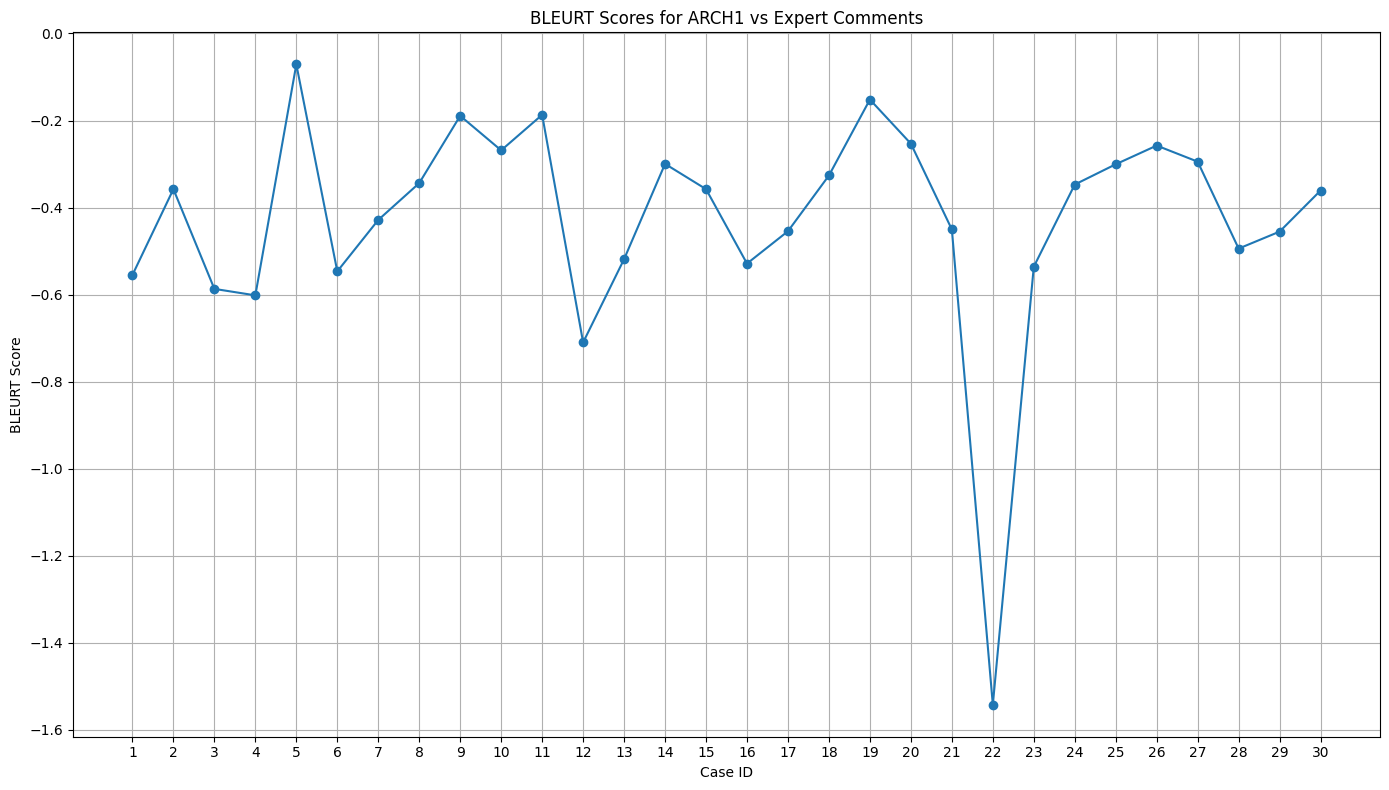

In [16]:
import matplotlib.pyplot as plt

# Plot BLEURT scores
plt.figure(figsize=(14, 8))  # Increase figure size for better readability
plt.plot(df['Case ID'], df['BLEURT Score'], marker='o')
plt.title('BLEURT Scores for ARCH1 vs Expert Comments')
plt.xlabel('Case ID')
plt.ylabel('BLEURT Score')
plt.grid(True)

# Set the x-ticks to be every case ID
plt.xticks(ticks=df['Case ID'], labels=df['Case ID'])

# Adjust layout to ensure labels fit into the plot area
plt.tight_layout()

plt.show()

## 2.2 Arch 2

In [59]:
#Creating the csv

import os
import pandas as pd

# Define the base directory where the cases are stored
base_dir = r'C:\Users\domin\Desktop\CrewTFM\Cases'

# Initialize an empty list to store the data
data = []

# Loop through each case directory
for case_dir in os.listdir(base_dir):
    case_path = os.path.join(base_dir, case_dir)
    
    if os.path.isdir(case_path):
        # Initialize variables for expert and LLM comments
        expert_content = ''
        llm_content = ''
        
        # Loop through each file in the case directory
        for file_name in os.listdir(case_path):
            file_path = os.path.join(case_path, file_name)
            
            # Check if it's the expert review file
            if 'Expert' in file_name:
                with open(file_path, 'r', encoding='utf-8') as f:
                    expert_content = f.read()
            
            # Check if it's the LLM-generated comment file
            elif 'summary_arch2.txt' in file_name:
                with open(file_path, 'r', encoding='utf-8') as f:
                    llm_content = f.read()
        
        # Extract the case number from the case directory name for sorting
        case_number = int(''.join(filter(str.isdigit, case_dir)))
        
        # Append the data to the list
        data.append({
            'Case ID': case_number,
            'Expert Comment': expert_content,
            'ARCH2 Comment': llm_content
        })

# Convert the list to a DataFrame
df2 = pd.DataFrame(data)

# Sort the DataFrame by Case ID
df2.sort_values(by='Case ID', inplace=True)

# Save the DataFrame to a CSV file
df2.to_csv('Arch_2_bleurt_evaluation_data_sorted.csv', index=False, encoding='utf-8')


In [62]:
import pandas as pd
from datasets import load_metric

# Load the CSV file
df2 = pd.read_csv(r'C:\Users\domin\Desktop\CrewTFM\Arch_2_bleurt_evaluation_data_sorted.csv')

# Check the first few rows to ensure it loaded correctly
print(df2.head())

# Load the BLEURT metric with trust_remote_code=True
bleurt2 = load_metric('bleurt', 'bleurt-base-128', trust_remote_code=True)

# Extract expert and LLM comments
expert_comments = df2['Expert Comment'].tolist()
llm_comments = df2['ARCH2 Comment'].tolist()

# Compute BLEURT scores
bleurt_scores = bleurt2.compute(predictions=llm_comments, references=expert_comments)

# Add BLEURT scores to the DataFrame
df2['BLEURT Score'] = bleurt_scores['scores']

# Save the results to a new CSV file
df2.to_csv('bleurt_evaluation_results_arch2.csv', index=False, encoding='utf-8')

# Display the first few rows of the results
print(df2.head())

   Case ID                                     Expert Comment  \
0        1  The extra information found on John Doe's Link...   
1        2  The extra information found on Jane Smith's Li...   
2        3  The extra information found on Emma Thompson's...   
3        4  The extra information found on Liam Williams's...   
4        5  The extra information found on Sophia Martinez...   

                                       ARCH2 Comment  
0  For instance, in John Doe's case, his LinkedIn...  
1  Jane Smith's LinkedIn profile suggests a stron...  
2  My best complete final answer to the task is a...  
3  After analyzing the summaries of CVs and Linke...  
4  Sophia Martinez's CV and LinkedIn profile both...  
   Case ID                                     Expert Comment  \
0        1  The extra information found on John Doe's Link...   
1        2  The extra information found on Jane Smith's Li...   
2        3  The extra information found on Emma Thompson's...   
3        4  The ext

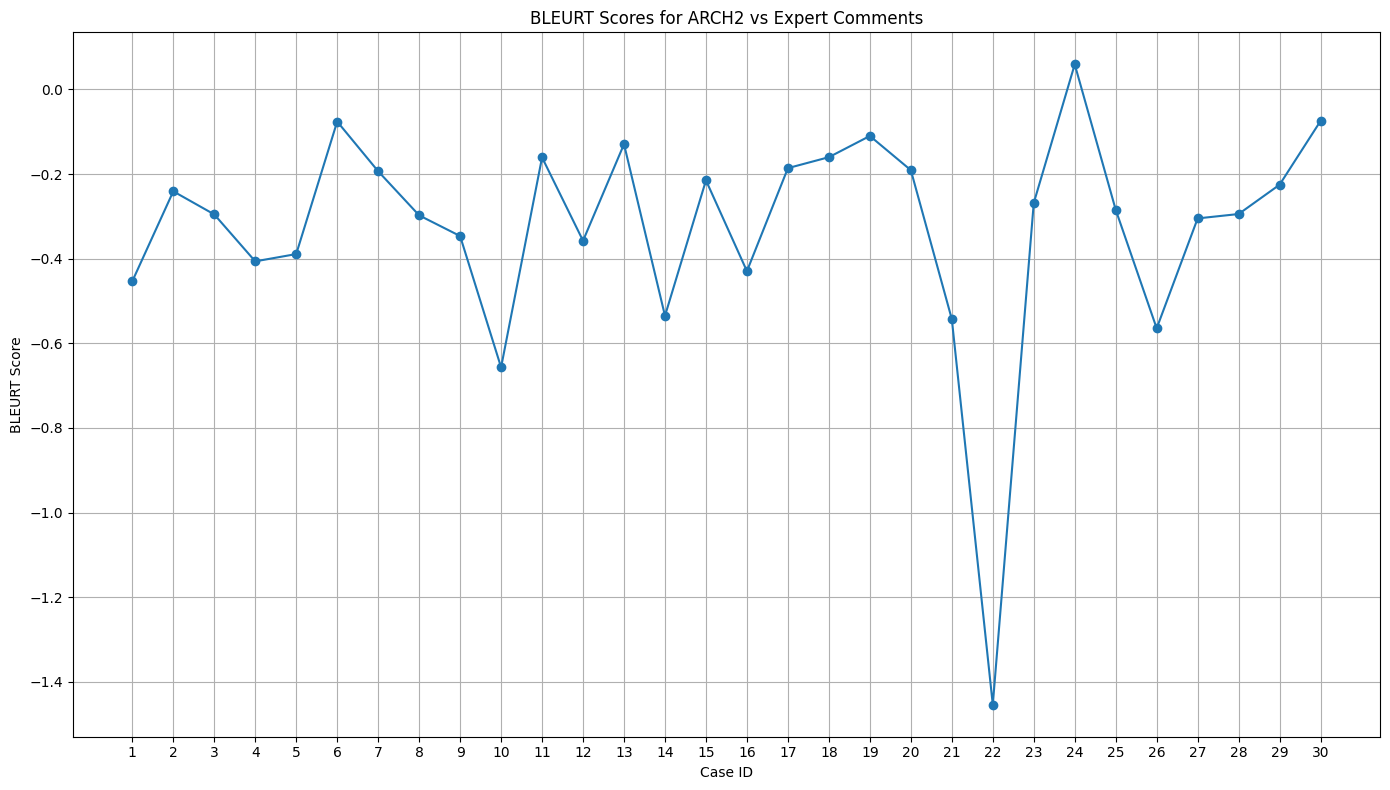

In [63]:
import matplotlib.pyplot as plt

# Plot BLEURT scores
plt.figure(figsize=(14, 8))  # Increase figure size for better readability
plt.plot(df2['Case ID'], df2['BLEURT Score'], marker='o')
plt.title('BLEURT Scores for ARCH2 vs Expert Comments')
plt.xlabel('Case ID')
plt.ylabel('BLEURT Score')
plt.grid(True)

# Set the x-ticks to be every case ID
plt.xticks(ticks=df2['Case ID'], labels=df2['Case ID'])

# Adjust layout to ensure labels fit into the plot area
plt.tight_layout()

plt.show()

## 2.3 Arch3

In [67]:
#Creating the csv

import os
import pandas as pd

# Define the base directory where the cases are stored
base_dir = r'C:\Users\domin\Desktop\CrewTFM\Cases'

# Initialize an empty list to store the data
data = []

# Loop through each case directory
for case_dir in os.listdir(base_dir):
    case_path = os.path.join(base_dir, case_dir)
    
    if os.path.isdir(case_path):
        # Initialize variables for expert and LLM comments
        expert_content = ''
        llm_content = ''
        
        # Loop through each file in the case directory
        for file_name in os.listdir(case_path):
            file_path = os.path.join(case_path, file_name)
            
            # Check if it's the expert review file
            if 'Expert' in file_name:
                with open(file_path, 'r', encoding='utf-8') as f:
                    expert_content = f.read()
            
            # Check if it's the LLM-generated comment file
            elif 'summary_arch3.txt' in file_name:
                with open(file_path, 'r', encoding='utf-8') as f:
                    llm_content = f.read()
        
        # Extract the case number from the case directory name for sorting
        case_number = int(''.join(filter(str.isdigit, case_dir)))
        
        # Append the data to the list
        data.append({
            'Case ID': case_number,
            'Expert Comment': expert_content,
            'ARCH3 Comment': llm_content
        })

# Convert the list to a DataFrame
df3 = pd.DataFrame(data)

# Sort the DataFrame by Case ID
df3.sort_values(by='Case ID', inplace=True)

# Save the DataFrame to a CSV file
df3.to_csv('Arch_3_bleurt_evaluation_data_sorted.csv', index=False, encoding='utf-8')


In [68]:
import pandas as pd
from datasets import load_metric

# Load the CSV file
df = pd.read_csv(r'C:\Users\domin\Desktop\CrewTFM\Arch_3_bleurt_evaluation_data_sorted.csv')

# Check the first few rows to ensure it loaded correctly
print(df3.head())

# Load the BLEURT metric with trust_remote_code=True
bleurt3 = load_metric('bleurt', 'bleurt-base-128', trust_remote_code=True)

# Extract expert and LLM comments
expert_comments = df3['Expert Comment'].tolist()
llm_comments = df3['ARCH3 Comment'].tolist()

# Compute BLEURT scores
bleurt_scores = bleurt3.compute(predictions=llm_comments, references=expert_comments)

# Add BLEURT scores to the DataFrame
df3['BLEURT Score'] = bleurt_scores['scores']

# Save the results to a new CSV file
df3.to_csv('bleurt_evaluation_results_arch3.csv', index=False, encoding='utf-8')

# Display the first few rows of the results
print(df3.head())

    Case ID                                     Expert Comment  \
0         1  The extra information found on John Doe's Link...   
11        2  The extra information found on Jane Smith's Li...   
22        3  The extra information found on Emma Thompson's...   
24        4  The extra information found on Liam Williams's...   
25        5  The extra information found on Sophia Martinez...   

                                        ARCH3 Comment  
0   My best complete final answer to the task is t...  
11  My best complete final answer to the task is a...  
22  Emma Thompson, positioned as the Lead Graphic ...  
24  Liam Williams' LinkedIn profile provides insig...  
25  Sophia Martinez's LinkedIn profile provides a ...  
    Case ID                                     Expert Comment  \
0         1  The extra information found on John Doe's Link...   
11        2  The extra information found on Jane Smith's Li...   
22        3  The extra information found on Emma Thompson's...   
24 

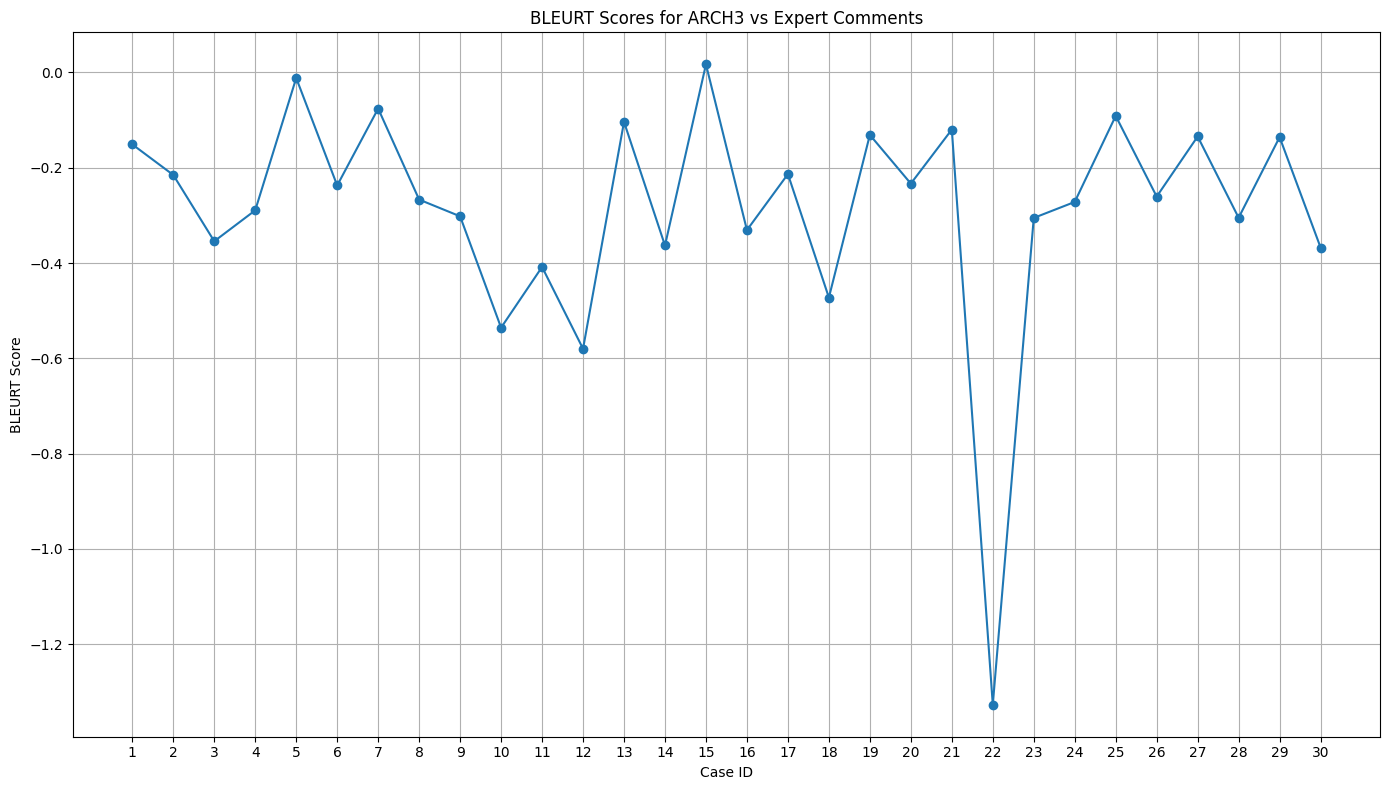

In [70]:
import matplotlib.pyplot as plt

# Plot BLEURT scores
plt.figure(figsize=(14, 8))  # Increase figure size for better readability
plt.plot(df3['Case ID'], df3['BLEURT Score'], marker='o')
plt.title('BLEURT Scores for ARCH3 vs Expert Comments')
plt.xlabel('Case ID')
plt.ylabel('BLEURT Score')
plt.grid(True)

# Set the x-ticks to be every case ID
plt.xticks(ticks=df3['Case ID'], labels=df3['Case ID'])

# Adjust layout to ensure labels fit into the plot area
plt.tight_layout()

plt.show()

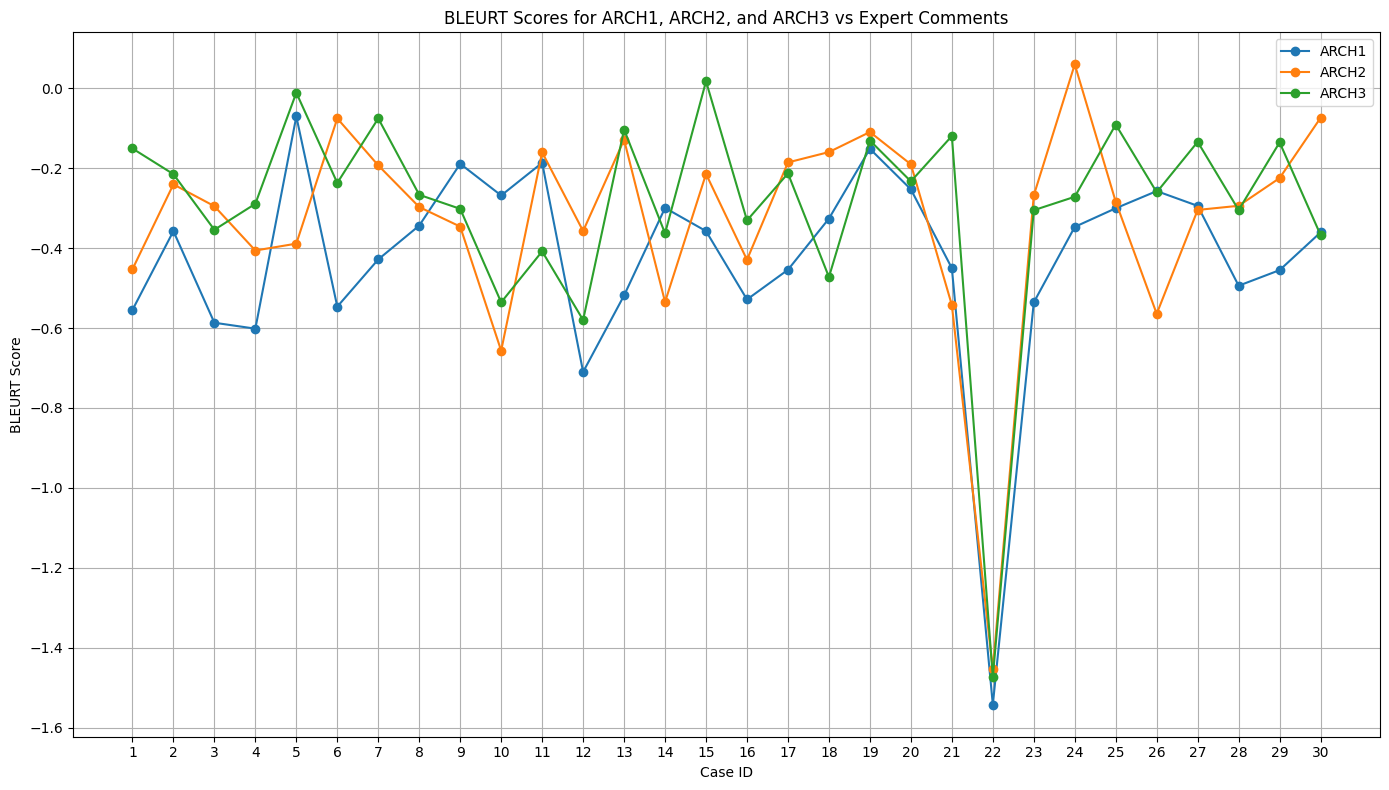

In [75]:
import pandas as pd
from datasets import load_metric
import matplotlib.pyplot as plt

# Load the CSV files for ARCH1, ARCH2, and ARCH3
df1 = pd.read_csv(r'C:\Users\domin\Desktop\CrewTFM\Arch_1_bleurt_evaluation_data_sorted.csv')
df2 = pd.read_csv(r'C:\Users\domin\Desktop\CrewTFM\Arch_2_bleurt_evaluation_data_sorted.csv')
df3 = pd.read_csv(r'C:\Users\domin\Desktop\CrewTFM\Arch_3_bleurt_evaluation_data_sorted.csv')

# Load the BLEURT metric
bleurt = load_metric('bleurt', 'bleurt-base-128', trust_remote_code=True)

# Compute BLEURT scores for ARCH1
bleurt_scores_1 = bleurt.compute(predictions=df1['LLM Comment'].tolist(), references=df1['Expert Comment'].tolist())
df1['BLEURT Score'] = bleurt_scores_1['scores']

# Compute BLEURT scores for ARCH2
bleurt_scores_2 = bleurt.compute(predictions=df2['ARCH2 Comment'].tolist(), references=df2['Expert Comment'].tolist())
df2['BLEURT Score'] = bleurt_scores_2['scores']

# Compute BLEURT scores for ARCH3
bleurt_scores_3 = bleurt.compute(predictions=df3['ARCH3 Comment'].tolist(), references=df3['Expert Comment'].tolist())
df3['BLEURT Score'] = bleurt_scores_3['scores']

# Save the updated DataFrames with BLEURT scores
df1.to_csv('bleurt_evaluation_results_arch1.csv', index=False, encoding='utf-8')
df2.to_csv('bleurt_evaluation_results_arch2.csv', index=False, encoding='utf-8')
df3.to_csv('bleurt_evaluation_results_arch3.csv', index=False, encoding='utf-8')

# Plot the BLEURT scores together
plt.figure(figsize=(14, 8))  # Increase figure size for better readability

# Plot BLEURT scores for ARCH1
plt.plot(df1['Case ID'], df1['BLEURT Score'], marker='o', label='ARCH1')

# Plot BLEURT scores for ARCH2
plt.plot(df2['Case ID'], df2['BLEURT Score'], marker='o', label='ARCH2')

# Plot BLEURT scores for ARCH3
plt.plot(df3['Case ID'], df3['BLEURT Score'], marker='o', label='ARCH3')

plt.title('BLEURT Scores for ARCH1, ARCH2, and ARCH3 vs Expert Comments')
plt.xlabel('Case ID')
plt.ylabel('BLEURT Score')
plt.grid(True)

# Set the x-ticks to be every case ID, using the unique Case IDs from df1 (assuming they are the same across all DataFrames)
plt.xticks(ticks=df1['Case ID'], labels=df1['Case ID'])

# Add a legend to differentiate the lines
plt.legend()

# Adjust layout to ensure labels fit into the plot area
plt.tight_layout()

plt.show()



# Manual evaluation

In [77]:
import pandas as pd

# Example data for demonstration
data = {
    'Case ID': ['Case1', 'Case2', 'Case3', 'Case4', 'Case5'],
    'Correctness_Arch1': [5, 5, 5, 5, 5],
    'Informativeness_Arch1': [5, 5, 5, 3, 5],
    'Relevance_Arch1': [4, 5, 5, 5, 5],
    'Clarity_Arch1': [5, 5, 5, 5, 5],
    'No_Hallucinations_Arch1': [5, 5, 5, 5, 5],


    'Correctness_Arch2': [5, 5, 5, 2, 4],
    'Informativeness_Arch2': [2, 5, 5, 2, 4],
    'Relevance_Arch2': [3, 4, 5, 2, 5],
    'Clarity_Arch2': [3, 5, 5, 2, 5],
    'No_Hallucinations_Arch2': [5, 5, 4, 5, 5],



    'Correctness_Arch3': [3, 4, 5, 4, 5],
    'Informativeness_Arch3': [1, 2, 4, 4, 4],
    'Relevance_Arch3': [4, 4, 5, 4, 5],
    'Clarity_Arch3': [4, 5, 5, 4, 5],
    'No_Hallucinations_Arch3': [5, 5, 5, 4, 5],


    'Correctness_Expert': [5, 5, 5, 4, 4],
    'Informativeness_Expert': [5, 5, 5, 4, 3],
    'Relevance_Expert': [5, 5, 5, 4, 3],
    'Clarity_Expert': [5, 5, 5, 5, 5],
    'No_Hallucinations_Expert': [5, 5, 5, 4, 5]
}
# Convert to DataFrame
df = pd.DataFrame(data)
# Save to CSV
df.to_csv('evaluation_scores.csv', index=False, encoding='utf-8')

In [18]:
%pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [79]:
import pandas as pd
import plotly.graph_objects as go

# Load the CSV file
df = pd.read_csv('evaluation_scores.csv')

# Calculate the averages for each criterion
averages = {
    'Criteria': ['Correctness', 'Informativeness', 'Relevance', 'Clarity', 'No Hallucinations'],
    'Arch1': [
        df['Correctness_Arch1'].mean(),
        df['Informativeness_Arch1'].mean(),
        df['Relevance_Arch1'].mean(),
        df['Clarity_Arch1'].mean(),
        df['No_Hallucinations_Arch1'].mean()
    ],
    'Arch2': [
        df['Correctness_Arch2'].mean(),
        df['Informativeness_Arch2'].mean(),
        df['Relevance_Arch2'].mean(),
        df['Clarity_Arch1'].mean(),
        df['No_Hallucinations_Arch1'].mean(),
    ],

    'Arch3': [
        df['Correctness_Arch3'].mean(),
        df['Informativeness_Arch3'].mean(),
        df['Relevance_Arch3'].mean(),
        df['Clarity_Arch3'].mean(),
        df['No_Hallucinations_Arch3'].mean(),
    ],





    'Expert': [
        df['Correctness_Expert'].mean(),
        df['Informativeness_Expert'].mean(),
        df['Relevance_Expert'].mean(),
        df['Clarity_Expert'].mean(),
        df['No_Hallucinations_Expert'].mean()
    ],
}

# Create DataFrame for averages
df_averages = pd.DataFrame(averages)

# Create radar charts
fig = go.Figure()

# Add LLM trace
fig.add_trace(go.Scatterpolar(
    r=df_averages['Arch1'],
    theta=df_averages['Criteria'],
    fill='toself',
    name='Arch1'
))

# Add Expert trace
fig.add_trace(go.Scatterpolar(
    r=df_averages['Arch2'],
    theta=df_averages['Criteria'],
    fill='toself',
    name='Arch2'
))

fig.add_trace(go.Scatterpolar(
    r=df_averages['Arch3'],
    theta=df_averages['Criteria'],
    fill='toself',
    name='Arch3',
))

fig.add_trace(go.Scatterpolar(
    r=df_averages['Expert'],
    theta=df_averages['Criteria'],
    fill='toself',
    name='Expert',
))

# Update layout to match the example style
fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 5]
        )),
    showlegend=True,
    title="Evaluation Comparison",
    legend=dict(
        title="Criteria",
        orientation="h",
        yanchor="bottom",
        y=1.1,
        xanchor="center",
        x=0.5
    )
)

# Show the plot
fig.show()